In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

QUESTION 1

In [2]:
df = pd.read_csv("housing_price_dataset.csv")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


QUESTION 2

a. DATA PREPROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [4]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [5]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [7]:
df.nunique()

SquareFeet       2000
Bedrooms            4
Bathrooms           3
Neighborhood        3
YearBuilt          72
Price           50000
dtype: int64

Data Formatting

In [8]:
df['Price'] = df['Price'].astype(int)
df['Price']

0        215355
1        195014
2        306891
3        206786
4        272436
          ...  
49995    100080
49996    374507
49997    384110
49998    380512
49999    221618
Name: Price, Length: 50000, dtype: int32

In [9]:
df['Neighborhood'] = df['Neighborhood'].astype(str)
df['Neighborhood']

0         Rural
1         Rural
2        Suburb
3         Urban
4        Suburb
          ...  
49995     Rural
49996    Suburb
49997    Suburb
49998     Rural
49999     Rural
Name: Neighborhood, Length: 50000, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SquareFeet    50000 non-null  int64 
 1   Bedrooms      50000 non-null  int64 
 2   Bathrooms     50000 non-null  int64 
 3   Neighborhood  50000 non-null  object
 4   YearBuilt     50000 non-null  int64 
 5   Price         50000 non-null  int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 2.1+ MB


Cek apakah ada outlier atau tidak melalui visualisasi

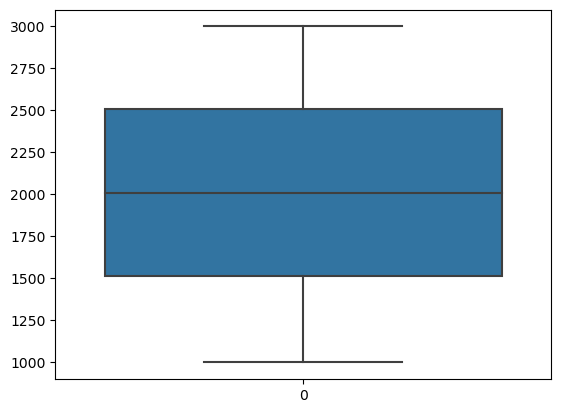

In [11]:
sns.boxplot(df['SquareFeet'])
plt.show()

<Axes: >

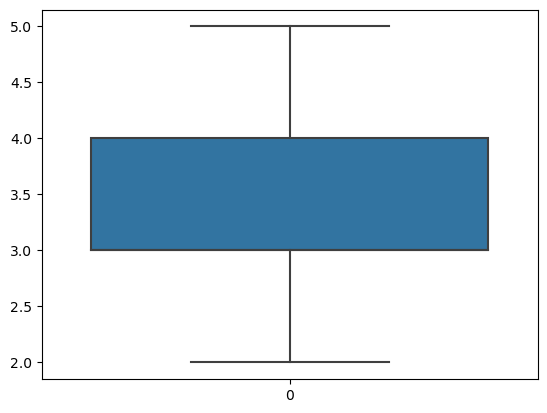

In [12]:
sns.boxplot(df['Bedrooms'])

<Axes: >

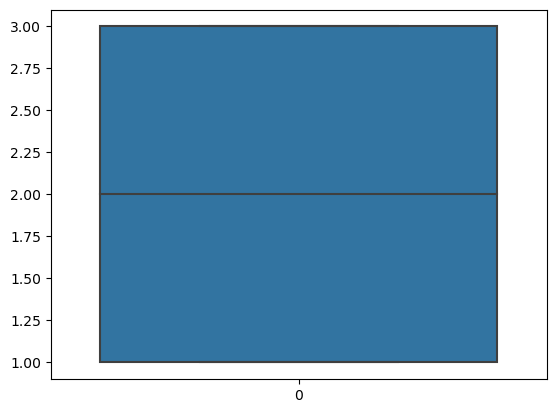

In [13]:
sns.boxplot(df['Bathrooms'])

<Axes: >

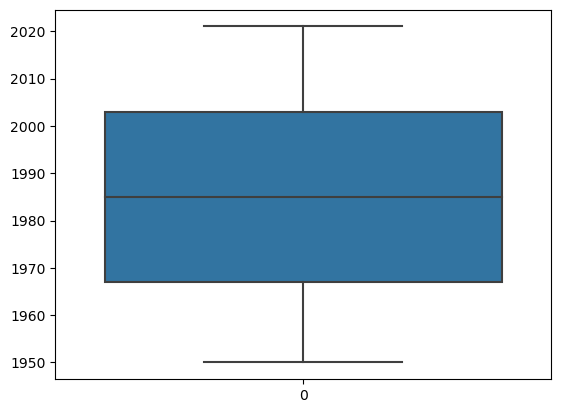

In [14]:
sns.boxplot(df['YearBuilt'])

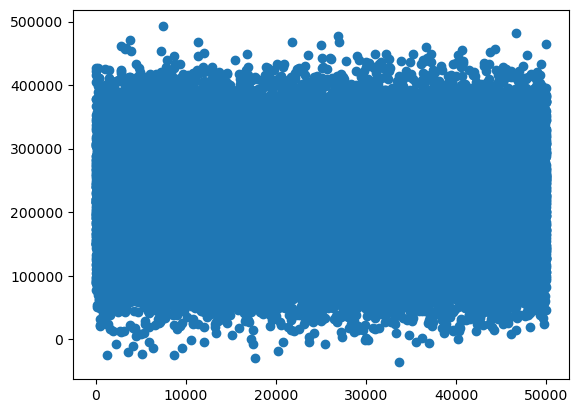

In [15]:
plt.scatter(range(len(df)), df['Price'])
plt.show()

In [40]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']]
y = df['Price']

xnormalize = scaler.fit_transform(x)

dfnormalize = pd.concat([pd.DataFrame(xnormalize, columns=x.columns), y], axis=1)
dfnormalize.head(10)

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,0.563282,0.666667,0.0,0.267606,215355
1,0.729865,0.333333,0.5,0.422535,195014
2,0.430215,0.000000,0.0,0.281690,306891
3,0.647324,0.000000,0.0,0.647887,206786
4,0.565283,1.000000,0.5,0.718310,272436
5,0.547774,0.000000,1.0,0.985915,198208
6,0.862431,0.000000,0.0,0.605634,343429
7,0.522261,0.666667,1.0,0.098592,184992
8,0.819410,0.666667,1.0,0.126761,377998
9,0.060530,1.000000,0.5,0.760563,95961


In [39]:
#Binning
bins = [0, 100000, 200000, 300000, 400000, 500000]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

df['Price_Category'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Price_Category
0,2126,4,1,0,1969,215355,Moderate
1,2459,3,2,0,1980,195014,Low
2,1860,2,1,1,1970,306891,High
3,2294,2,1,2,1996,206786,Moderate
4,2130,5,2,1,2001,272436,Moderate
...,...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080,Low
49996,2854,2,2,1,1988,374507,High
49997,2979,5,3,1,1962,384110,High
49998,2596,5,2,0,1984,380512,High


In [17]:
#Encoding
from sklearn import preprocessing
encode_neighbor = preprocessing.LabelEncoder()
df['Neighborhood'] = encode_neighbor.fit_transform(df['Neighborhood'])
df
#0 = Rural, 1 = Suburb, 2 = Urban

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355
1,2459,3,2,0,1980,195014
2,1860,2,1,1,1970,306891
3,2294,2,1,2,1996,206786
4,2130,5,2,1,2001,272436
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080
49996,2854,2,2,1,1988,374507
49997,2979,5,3,1,1962,384110
49998,2596,5,2,0,1984,380512


GROUPING

In [18]:
#Melihat Rata rata harga rumah dengan square feet tertentu
group1 = df.groupby('SquareFeet')['Price'].mean()
group1

SquareFeet
1000    116107.466667
1001    125030.800000
1002    117941.705882
1003    112129.869565
1004    106878.000000
            ...      
2995    350364.666667
2996    324811.575758
2997    334958.250000
2998    331865.260870
2999    330563.607143
Name: Price, Length: 2000, dtype: float64

In [19]:
#Melihat harga tumah termahal dari beberapa neighborhood (0 = Rural, 1 = Suburb, 2 = Urban)
group2 = df.groupby('Neighborhood')['Price'].max()
group2

Neighborhood
0    492195
1    482577
2    476671
Name: Price, dtype: int32

In [20]:
#Melihat jumlah rumah yang terjual untuk setiap YearBuilt
group3 = df.groupby('YearBuilt')['Price'].size()
group3

YearBuilt
1950    643
1951    698
1952    723
1953    685
1954    704
       ... 
2017    692
2018    704
2019    662
2020    704
2021    648
Name: Price, Length: 72, dtype: int64

b. DATA VISUALIZATION

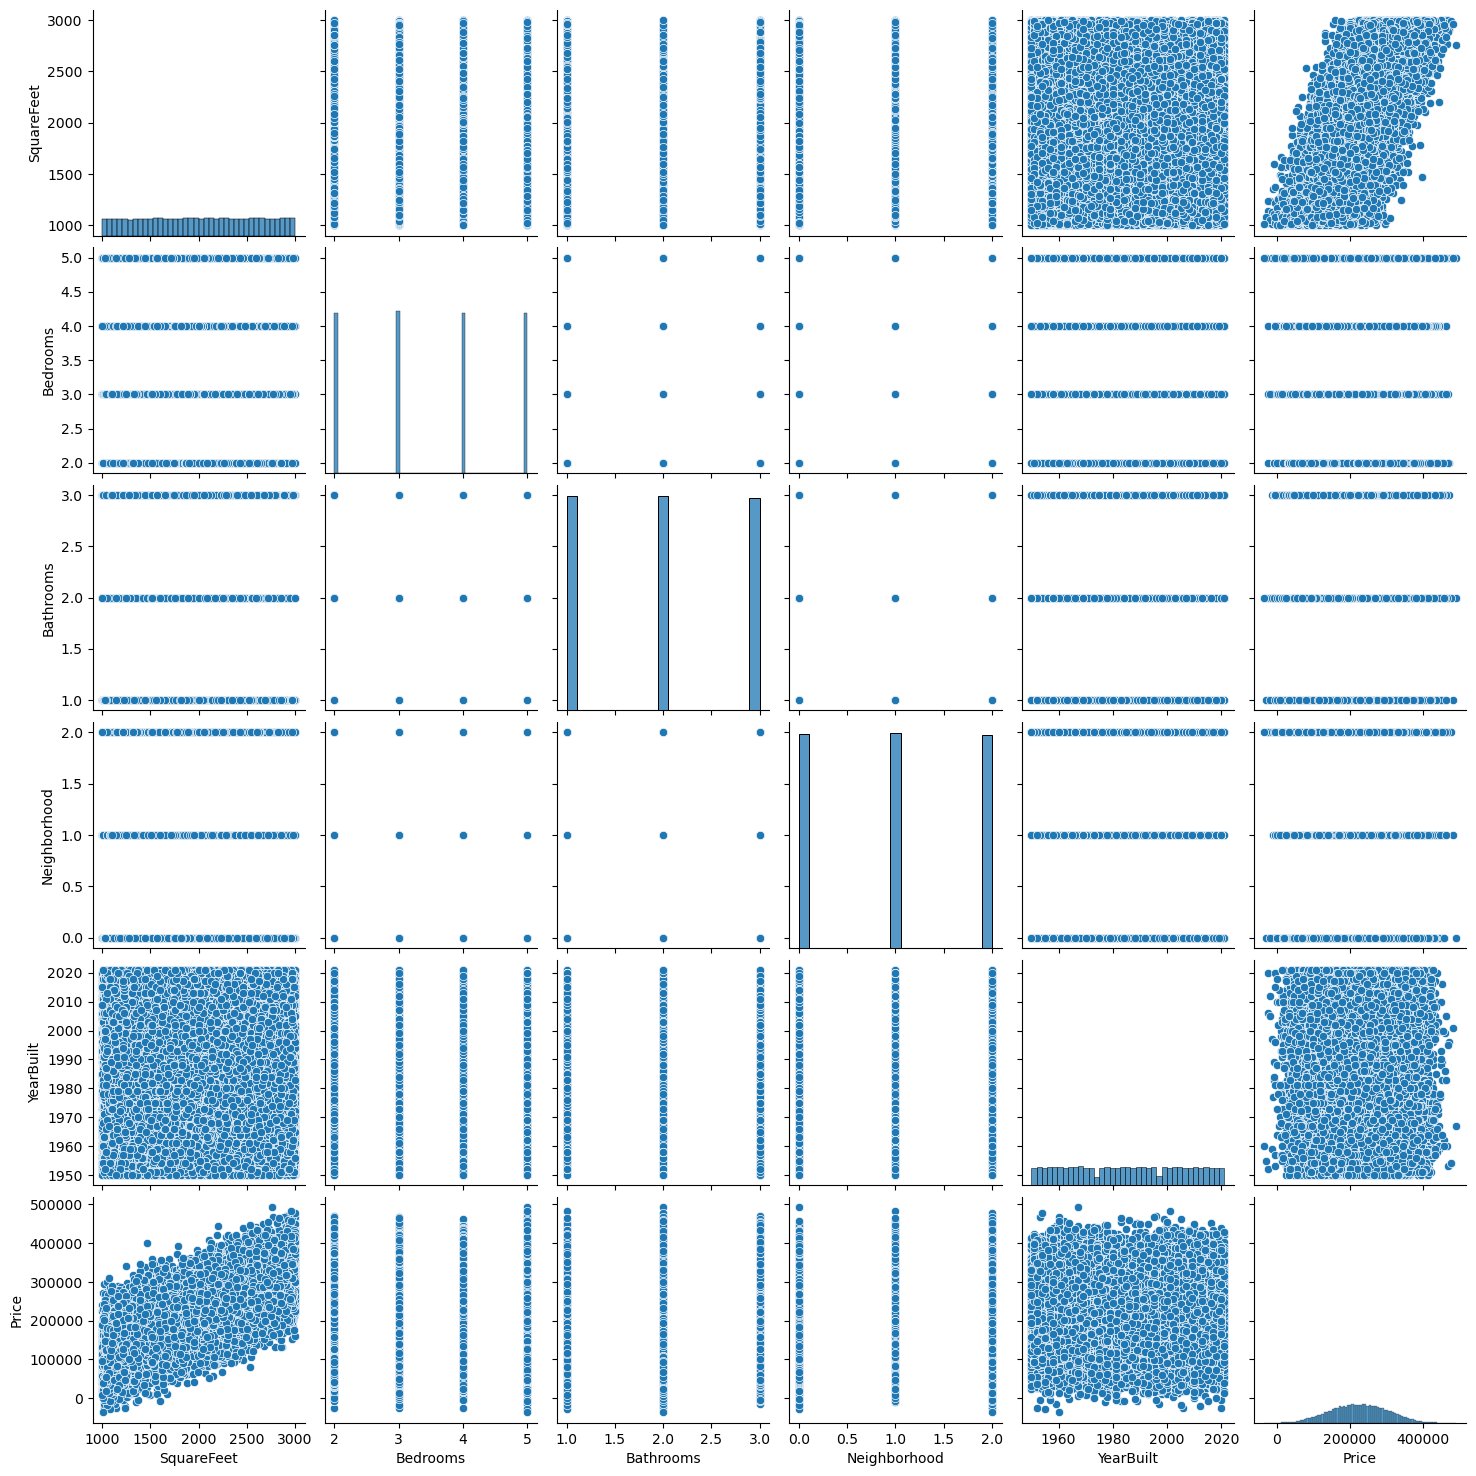

In [21]:
#visualisasi hubungan antara variabel numerik melalui pola dan korelasinya
sns.pairplot(df)
plt.show()

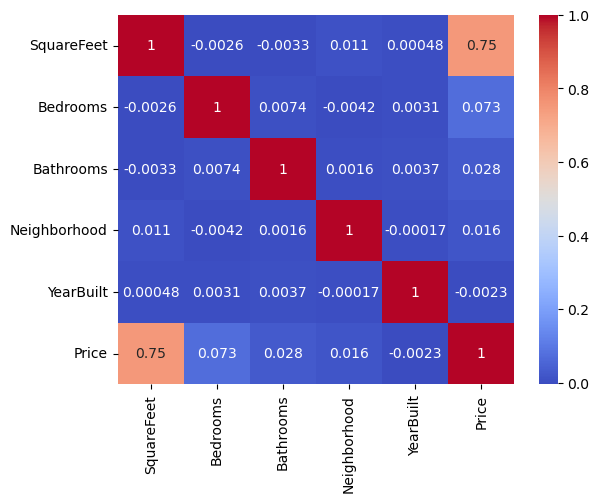

In [22]:
#Heatmap untuk melihat seberapa tinggi korelasi yang dimiliki diantara variabel
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

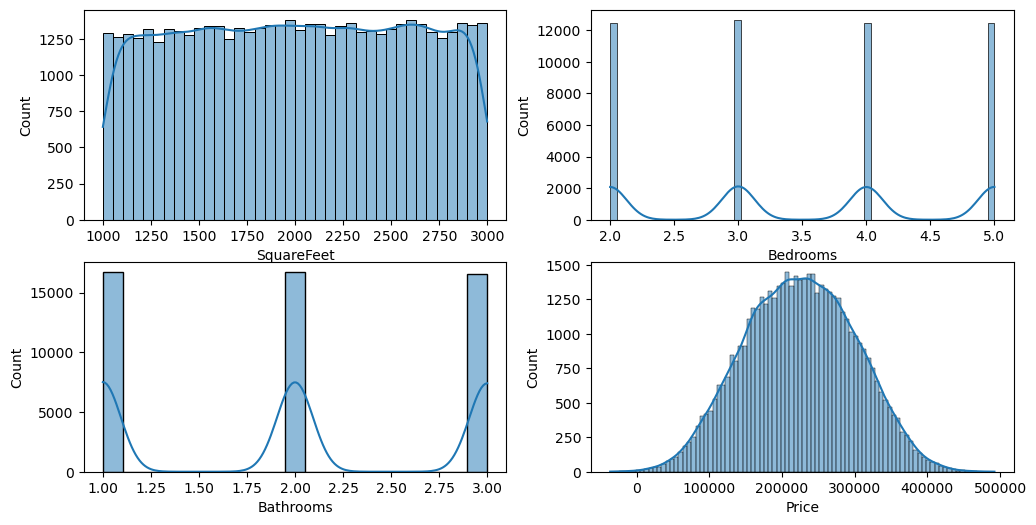

In [23]:
#Visualisasi distribusi data numerik dengan menggunakan histogram yang dilengkapi dengan density
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['SquareFeet'], kde=True)
plt.subplot(2, 2, 2)
sns.histplot(df['Bedrooms'], kde=True)
plt.subplot(2, 2, 3)
sns.histplot(df['Bathrooms'], kde=True)
plt.subplot(2, 2, 4)
sns.histplot(df['Price'], kde=True)
plt.show()

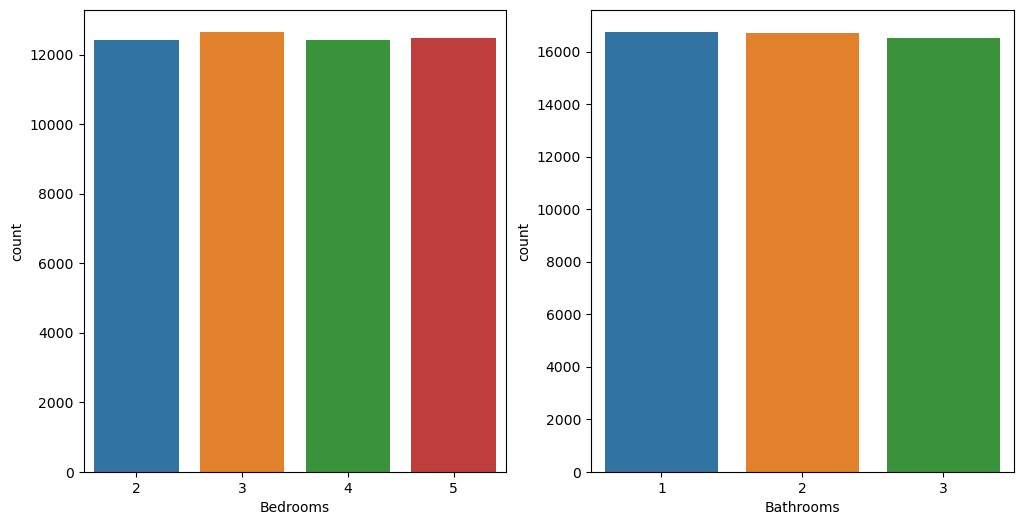

In [24]:
#Distribusi jumlah kamar tidur dan kamar mandi yang ada pada rumah
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Bedrooms', data=df)
plt.subplot(1, 2, 2)
sns.countplot(x='Bathrooms', data=df)
plt.show()


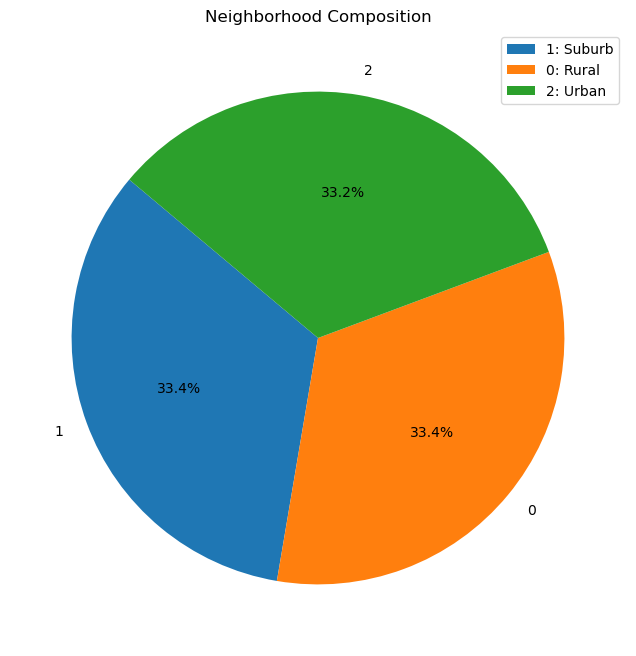

In [25]:
#Komposisi Neighborhood dari rumah, 0 = Rural, 1 = Suburb, 2 = Urban
neighborhood_counts = df['Neighborhood'].value_counts()

neighborhood_labels = {0: 'Rural', 1: 'Suburb', 2: 'Urban'}

plt.figure(figsize=(8, 8))
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Neighborhood Composition')

legend_labels=[f'{label}: {neighborhood_labels[value]}' for value,label in zip(neighborhood_counts.index,neighborhood_counts.index)]
plt.legend(legend_labels, loc='upper right')

plt.show()

QUESTION 3

Simple Linear Regression

In [26]:
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['SquareFeet']])
train_y = np.asarray(train[['Price']])
regr.fit(train_x, train_y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[99.39073638]]
Intercept:  [25528.848058]


Text(0, 0.5, 'Price')

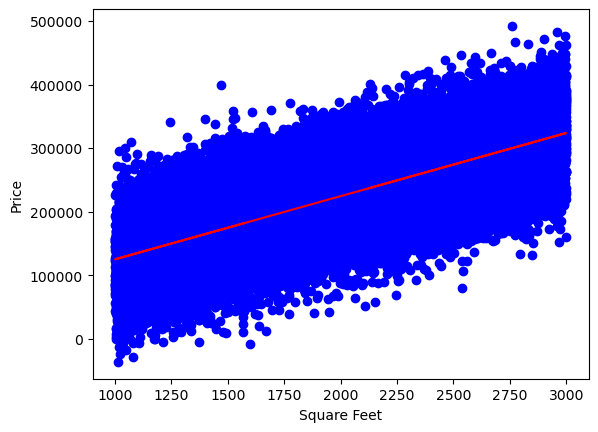

In [28]:
plt.scatter(train['SquareFeet'], train['Price'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Polynomial Linear Regression

In [29]:
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['SquareFeet']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['SquareFeet']])
test_y = np.asanyarray(test[['Price']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 2.459000e+03, 6.046681e+06],
       [1.000000e+00, 1.860000e+03, 3.459600e+06],
       [1.000000e+00, 2.294000e+03, 5.262436e+06],
       ...,
       [1.000000e+00, 2.979000e+03, 8.874441e+06],
       [1.000000e+00, 2.596000e+03, 6.739216e+06],
       [1.000000e+00, 1.572000e+03, 2.471184e+06]])

In [31]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.00000000e+00  9.97791539e+01 -9.49234027e-05]]
Intercept:  [25111.34212037]


Text(0, 0.5, 'Price')

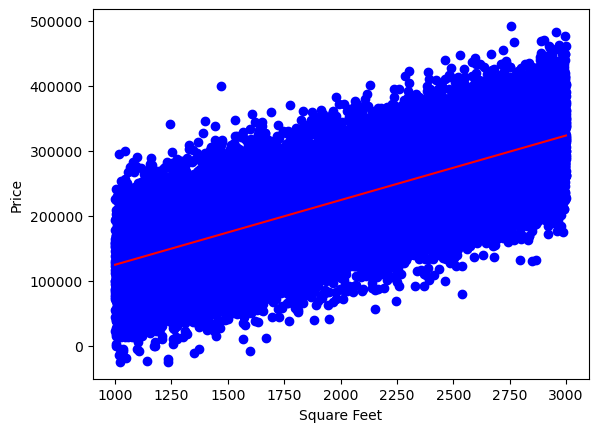

In [32]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_y_ = clf.fit(train_x_poly, train_y)

plt.scatter(train['SquareFeet'], train['Price'], color='blue')
XX = np.arange(1000, 3000, 0.1).reshape(-1, 1)
XX_poly = poly.transform(XX)
yy = clf.predict(XX_poly)
plt.plot(XX, yy, '-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Prediksi Harga

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

Simple Linear Regression

In [34]:
x = df[['SquareFeet']].values  
y = df['Price'].values  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_predict = linear_model.predict(x_test)

predictdf = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_predict})
print(predictdf)

       Actual Price  Predicted Price
0            165490    209513.623566
1            224044    212487.606496
2            289747    266217.564770
3             78120    169563.119536
4            224462    272462.928923
...             ...              ...
14995        218140    236477.735467
14996        327060    313008.229539
14997        227261    255709.491749
14998        334732    323318.037031
14999        230224    237766.461403

[15000 rows x 2 columns]


Polynomial Linear Regression

In [35]:
poly = PolynomialFeatures(degree=2)  
x_poly = poly.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)

x_poly_test = poly.transform(x_test)
y_poly_predict = poly_model.predict(x_poly_test)

y_test = y_test.reshape(-1)
y_poly_predict = y_poly_predict.reshape(-1)

predictdf = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_poly_predict})
print(predictdf)

       Actual Price  Predicted Price
0            165490    209415.849802
1            224044    212387.217138
2            289747    266168.406489
3             78120    169555.915491
4            224462    272431.833640
...             ...              ...
14995        218140    236377.157465
14996        327060    313155.726460
14997        227261    255635.632546
14998        334732    323527.894623
14999        230224    237666.926352

[15000 rows x 2 columns]


Evaluasi Model

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SquareFeet']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 40228.06
Residual sum of squares (MSE): 2530674017.42
R2-score: 0.56


In [37]:
test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 40227.86
Residual sum of squares (MSE): 2530680198.79
R2-score: 0.56
